In [132]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

Loading the dataset

In [133]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()


In [134]:
len(X_train)

60000

In [135]:
X_train[0].shape

(28, 28)

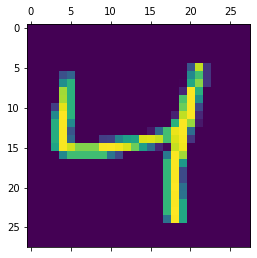

In [136]:
plt.matshow(X_train[2])

Normalizing the pixel values between 0 and 1 

In [137]:
X_train=X_train/255
X_test=X_test/255

Reshaping X_train(matrix) into X_train_flattened(column vector)

In [150]:
X_train_flattened=X_train.reshape(len(X_train),28*28)
X_test_flattened=X_test.reshape(len(X_test),28*28)
X_train_flattened[67].shape

(784,)

ANN architecture

In [139]:
model=keras.Sequential([keras.layers.Dense(150,input_shape=(784,),activation='relu'),
                        keras.layers.Dense(100,input_shape=(784,),activation='relu'),
                        keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')])

In [140]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [141]:
model.fit(X_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2302 - accuracy: 0.9320
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0970 - accuracy: 0.9708
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0674 - accuracy: 0.9784
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0513 - accuracy: 0.9836
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0395 - accuracy: 0.9870


In [142]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0961 - accuracy: 0.9734


[0.09610234946012497, 0.9733999967575073]

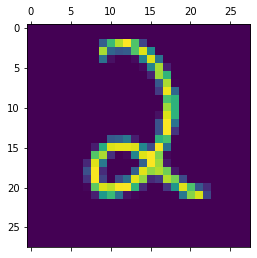

In [143]:
plt.matshow(X_test[47])

In [144]:
y_predicted=model.predict(X_test_flattened)
y_predicted.shape

313/313 [==============================] - 0s 1ms/step


(10000, 10)

In [145]:
y_predicted[47]

array([5.1391271e-05, 4.2053229e-01, 9.9999845e-01, 6.0639612e-02,
       5.6934729e-02, 4.1507925e-03, 6.4267457e-02, 5.4068960e-02,
       4.2085359e-03, 1.1986738e-06], dtype=float32)

In [151]:
np.argmax(y_predicted[47])

2

In [147]:
y_predicted_labels=[np.argmax(i) for i in y_predicted]

Confusion Matrix

In [148]:
confusionmatrix=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
confusionmatrix

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 952,    0,    5,    1,    0,    9,    3,    5,    2,    3],
       [   0, 1112,    3,    2,    0,    1,    2,    6,    9,    0],
       [   2,    0, 1009,    3,    3,    0,    1,   12,    2,    0],
       [   0,    1,    3,  994,    0,    0,    0,    6,    5,    1],
       [   1,    0,    5,    0,  962,    0,    2,    3,    2,    7],
       [   2,    0,    0,   22,    0,  858,    4,    1,    4,    1],
       [   1,    3,    0,    1,    5,    4,  941,    1,    2,    0],
       [   1,    1,    7,    1,    1,    0,    0, 1016,    1,    0],
       [   2,    0,    9,    9,    5,    2,    4,   14,  927,    2],
       [   1,    4,    1,    6,    9,    6,    1,   16,    2,  963]])>

Text(114.0, 0.5, 'True Label')

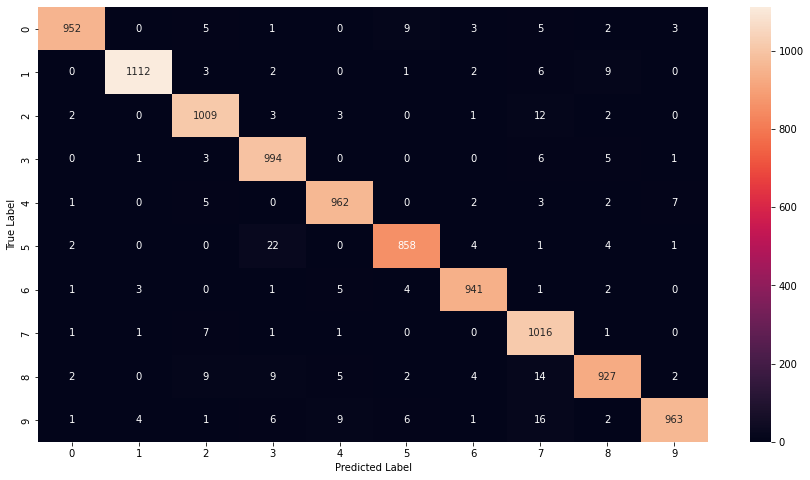

In [149]:
import seaborn as sn
plt.figure(figsize=(15,8))
sn.heatmap(confusionmatrix,annot=True,fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')